In [9]:
#tensorflow
#google이 만든 머신러닝을 위한 라이브러리(python, c언어)
#tensorflow를 이용해 보자
#hello world를 출력

#tensorflow의 구성요소
#1.node : 수학적인 연산을 담당, 데이터의 입출력 (tensor의 입출력) / 동그라미
#2.tensor : 다차원 array(주로 matrix(2차원))
#3. edge : 한 node가 가지고 있는 tensor를 다른 node로 이동 /선

#tensorflow은 노드와 텐서와 에지로 구성되어 있는 그래프를 만드는 것, 방향성이 있는 그래프
#runner(session) : 노드를 실행시켜주는 역할을 함

import tensorflow as tf
my_node = tf.constant("Hello World")
print(my_node)       #몇번째 상수, 현재데이터의 형태 shape, type
#shape(3,) : 1차원 3개데이터가 들어가 있음,  shape() : 차원이 없다, 리스트가 아니다 > 하나의 값이다

sess = tf.Session() #session, runner(node를 실행시켜줌)
print(sess.run(my_node).decode())

Tensor("Const_7:0", shape=(), dtype=string)
Hello World


In [12]:
import tensorflow as tf 
import numpy as np

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1+node2  #tf.add(node1,node2) 정형적인 방식

sess=tf.Session()
sess.run(node3) #run(실행시킬 노드를 지정해줌) = 실행
sess.run([node1,node2,node3]) #값 세개 나오니깐 리스트로 

[10.0, 20.0, 30.0]

In [21]:
#placeholder(데이터를 받아들이는 그릇 = 입력 파라미터)
import tensorflow as tf 
import numpy as np

node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1+node2

sess=tf.Session()
#sess.run(node3, feed_dict={node1:100, node2:200})
#sess.run(node3, feed_dict={node1:input(), node2:input()})
sess.run(node3, feed_dict={node1:[10,20,30,40], node2:[10,20,30,40]})  #node1과 2 개수 맞춰줘야 함


array([20., 40., 60., 80.], dtype=float32)

In [24]:
import tensorflow as tf
#node1=tf.constant(3, dtype=tf.float32)
node1=tf.constant([1,2,3], dtype=tf.float32)
node1

<tf.Tensor 'Const_16:0' shape=(3,) dtype=float32>

In [39]:
#간단한 linear regression을 이용한 머신러닝
import tensorflow as tf

#training data set
#x = [1,2,3]   #독립변수, 입력데이터
#y = [1,2,3]   #종속변수, 입력데이터의 label

x = [1,2,3]   #독립변수, 입력데이터
y = [3,5,7]   #종속변수, 입력데이터의 label
#w=2  b=1


#weight&bias 정의 (w와 b의 초깃값은 랜덤으로)
W=tf.Variable(tf.random_normal([1]), name="weight") #변수
b=tf.Variable(tf.random_normal([1]), name="bias") #변수

#Hypothesis 가설 (우리가 최종적으로 알아내야 하는 직선)
#데이터에 가장 인접한 직선, 예측모델이 만들어졋으니 prediction이 가능
H=W*x+b

#Cost function(Loss functino, 비용함수)
#Cost function이 최소가 되는 W와 b값 구하는 것이 목적
cost=tf.reduce_mean(tf.square(H-y))   #square 제곱

#cost function의 minimize작업
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #GD(하강)알고리즘 : 한단계 최솟값을 찾는 알고리즘
train = optimizer.minimize(cost)

#그래프를 실행시키기 위한 runner역할을 하는 session
sess = tf.Session()

#Variable로 사용할 경우 초기화를 시켜줘야 함
sess.run(tf.global_variables_initializer())   

for step in range(3000):
    _,w_val,b_val,cost_val= sess.run([train,W,b,cost])   #각 노드가 가지고 있는 값을 뽑아냄 
    if step % 300 ==0: #300번 반복될때마다 출력
        print("w:{}, b:{}, cost:{}".format(w_val,b_val,cost_val))




w:[-0.07102275], b:[-1.4112241], cost:57.88896560668945
w:[2.26859], b:[0.38943183], cost:0.053737591952085495
w:[2.1304696], b:[0.703412], cost:0.012679941952228546
w:[2.0633762], b:[0.8559309], cost:0.0029919345397502184
w:[2.0307853], b:[0.9300176], cost:0.000705974642187357
w:[2.0149543], b:[0.9660053], cost:0.0001665841118665412
w:[2.007264], b:[0.98348725], cost:3.9304388337768614e-05
w:[2.0035286], b:[0.9919786], cost:9.274586773244664e-06
w:[2.0017152], b:[0.9961017], cost:2.1904731966060353e-06
w:[2.0008342], b:[0.9981038], cost:5.182970994610514e-07


In [49]:
#간단한 linear regression을 이용한 머신러닝
import tensorflow as tf

#training data set
x_data = [1,2,3]   #독립변수, 입력데이터
y_data= [3,5,7]   #종속변수, 입력데이터의 label


#placeholder
x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)


#weight&bias 정의 (w와 b의 초깃값은 랜덤으로)
W=tf.Variable(tf.random_normal([1]), name="weight") #변수
b=tf.Variable(tf.random_normal([1]), name="bias") #변수

#Hypothesis 가설 (우리가 최종적으로 알아내야 하는 직선)
#데이터에 가장 인접한 직선, 예측모델이 만들어졋으니 prediction이 가능
H=W*x+b

#Cost function(Loss functino, 비용함수)
#Cost function이 최소가 되는 W와 b값 구하는 것이 목적
cost=tf.reduce_mean(tf.square(H-y))   #square 제곱

#cost function의 minimize작업
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #GD(하강)알고리즘 : 한단계 최솟값을 찾는 알고리즘
train = optimizer.minimize(cost)

#그래프를 실행시키기 위한 runner역할을 하는 session
sess = tf.Session()

#Variable로 사용할 경우 초기화를 시켜줘야 함
sess.run(tf.global_variables_initializer())   

for step in range(3000):
    _,w_val,b_val,cost_val= sess.run([train,W,b,cost],feed_dict={x:x_data,y:y_data})   #각 노드가 가지고 있는 값을 뽑아냄 
    if step % 300 ==0: #300번 반복될때마다 출력
        print("w:{}, b:{}, cost:{}".format(w_val,b_val,cost_val))
    

#prediction
sess.run(H, feed_dict={x:10})


w:[-0.09771606], b:[-0.06491436], cost:38.7179069519043
w:[2.025446], b:[0.9421557], cost:0.00048231627442874014
w:[2.01236], b:[0.9719026], cost:0.00011380054638721049
w:[2.006004], b:[0.9863512], cost:2.685286926862318e-05
w:[2.002917], b:[0.99336904], cost:6.337811555567896e-06
w:[2.0014184], b:[0.9967766], cost:1.4978785429775598e-06
w:[2.000691], b:[0.99843085], cost:3.550389067186188e-07
w:[2.0003366], b:[0.99923563], cost:8.421839226002703e-08
w:[2.0001638], b:[0.99962693], cost:2.0033136038932753e-08
w:[2.0000803], b:[0.9998156], cost:4.8977804034677774e-09


array([21.000303], dtype=float32)

In [ ]:
#특정 조건하에 검증
#카이제곱
#독립 t두 집단의 평균이 관련이 있느냐 
#대응표본 t한 집단의 전과 후의 효과
#아노바 범주가 2개이상일 경우

#회귀분석
#두개의 파라미터값이 관계가 있느냐 없느냐

#선형회귀분석
#기울기와 절편을 구하는 과정을 학습이라고 한다
#최소제곱법활용(주로),기대값과 공분산 활용
#차이를 제곱해서

cost : 568.1011962890625
cost : 5.9574456214904785
cost : 5.384549140930176
cost : 4.969062805175781
cost : 4.667737007141113
cost : 4.4492058753967285
cost : 4.290719032287598
cost : 4.175779342651367
cost : 4.092419147491455
cost : 4.031965255737305


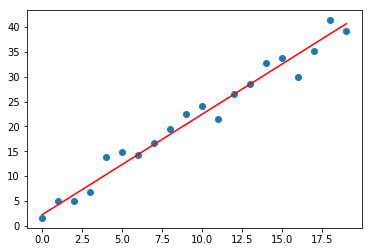

array([32.575054], dtype=float32)

In [22]:
%matplotlib inline
#기본적인 linear regression 예제
import tensorflow as tf #tensor flow module을 불러들인다
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)
#training data set
x_data = np.arange(0,20,1)
y_data = np.array([t*2 + np.random.normal(2,2) for t in x_data])   #lable에 해당

#일단 먼저 눈으로 확인
plt.scatter(x_data,y_data)
#plt.show()

#placeholder
X=tf.placeholder(dtype=tf.float32)  #shape과 type이 들어감/ 빈공간
Y=tf.placeholder(dtype=tf.float32)  #shape과 type이 들어감

#Weignt & bias
W=tf.Variable(tf.random_normal([1]), name="weight")  #난수로 하나만 발생
b=tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
H=W*X+b

#cost function
cost = tf.reduce_mean(tf.square(H-Y))   #square 제곱함수

#train 학습노드
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)  #0.01넣었을때 값이 안나와서 점점 줄임
#minimize 함수는 해당 코스트 함수를 한단계 줄인다

#session 해당 그래프를 실행시킬 수 있는/ variable에 대한 초기화 진행
sess= tf.Session()
sess.run(tf.global_variables_initializer())  #초기화

#학습   #트레이닝 데이타 전체 이용해서 한번 학습시키는 것 = 1에폭
for step in range(3000):  #3000에폭  #데이터 사이즈가 작기때문에 여러번 돌리는게 가능
    _,cost_val=  sess.run([train,cost], feed_dict={X:x_data,Y:y_data})   #train노드는 받을 결과값이 없다= _
    if step%300==0:
        print("cost : {}".format(cost_val))
        
#입력데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행될 수 있다.
#만약 학습이 정상적으로 이루어졌으면 w,b값이 결정

x_line=np.arange(0,20,1)
y_line=np.array([sess.run(W)*t+sess.run(b) for t in x_line])  
plt.plot(x_line,y_line,"r")
plt.show()


#prediction
sess.run(H, feed_dict={X:15})



In [51]:
#ozone데이터를 이용한 linear regression
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#1.Data Loading
data=pd.read_csv("./data/ozone.csv", sep=",")
data.head()

#temp와 ozone의 관계를 알아보기위해 plt를 이용해서 그림을 그려라

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


cost : 1.3779722452163696
cost : 1.0887963771820068
cost : 0.895678699016571
cost : 0.766710638999939
cost : 0.6805828809738159
cost : 0.6230648159980774
cost : 0.5846529006958008
cost : 0.5590004324913025
cost : 0.5418691039085388
cost : 0.530428409576416


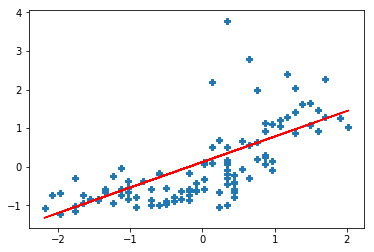

array([10.035938], dtype=float32)

In [50]:
#ozone데이터를 이용한 linear regression
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#1.Data Loading
data=pd.read_csv("./data/ozone.csv", sep=",")

#Data에 nan결측값이 있으면 제거하거나 다른 값으로 대체해서 사용
df=data.dropna(how="any", inplace=False) 

##데이터 분포를 보려면 scatter를 이용
x_data=np.array((df["Temp"]-df["Temp"].mean())/df["Temp"].std())
y_data=np.array((df["Ozone"]-df["Ozone"].mean())/df["Ozone"].std())

plt.scatter(x_data,y_data, marker="P") #앞에는 독립변수x, 뒤에는 y
#plt.show()

#데이터의 단위가 서로 다르기에 해당 데이터를 같은 형식으로 바꿔줌
#Normalization, Standardization
#Standardization : (현재값 - 평균) / 표준편차   =일정하게 표준화 시켜줌
#Normalization : (현재값 - 최솟값) / (최댓값 - 최솟값)   


#placeholder
X=tf.placeholder(dtype=tf.float32)  #shape과 type이 들어감/ 빈공간
Y=tf.placeholder(dtype=tf.float32)  #shape과 type이 들어감

#Weignt & bias
W=tf.Variable(tf.random_normal([1]), name="weight")  #난수로 하나만 발생
b=tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
H=W*X+b

#cost function
cost = tf.reduce_mean(tf.square(H-Y))   #square 제곱함수

#train 학습노드
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  #0.01넣었을때 값이 안나와서 점점 줄임
#minimize 함수는 해당 코스트 함수를 한단계 줄인다

#session 해당 그래프를 실행시킬 수 있는/ variable에 대한 초기화 진행
sess= tf.Session()
sess.run(tf.global_variables_initializer())  #초기화

#학습   #트레이닝 데이타 전체 이용해서 한번 학습시키는 것 = 1에폭
for step in range(100):  #3000에폭  #데이터 사이즈가 작기때문에 여러번 돌리는게 가능
    _,cost_val= sess.run([train,cost], feed_dict={X:x_data,Y:y_data})   #train노드는 받을 결과값이 없다= _
    if step%10==0:
        print("cost : {}".format(cost_val))
        
#입력데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행될 수 있다.
#만약 학습이 정상적으로 이루어졌으면 w,b값이 결정

x_line=np.array((x_data-x_data.mean())/x_data.std())
#y_line=(y_data-y_data.mean())/y_data.std()
y_line=np.array([sess.run(W)*t+sess.run(b) for t in x_line])  
plt.plot(x_line,y_line,"r")
plt.show()


#prediction
sess.run(H, feed_dict={X:15})


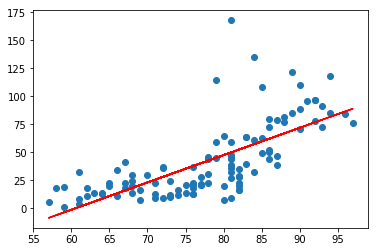

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#Data Loading
data=pd.read_csv("./data/ozone.csv", sep=",")
df=data.dropna(how="any", inplace=False)

#독립변수와 종속변수를 뽑는다
x=df["Temp"]     #입력파라미터(x)=레이블df["Temp"]
y=df["Ozone"]    #입력파리미터(y)=레이블

result=stats.linregress(x,y)
result   #slope 기울기 / intercept 절편 / rvalue 상관계수(0에 가까우면 상관없음) /
         
W=result[0]
b=result[1]
plt.scatter(x,y)
plt.plot(x,W*x+b,"r")
plt.show()


In [ ]:
#multiple linear regression
import tensorflow as tf

#training data set
x_data=[[73,80,75],
        [93,88,93],
        [89,91,90],
        [96,98,100],
        [73,66,70]]

y_data=[[152],[185],[180],[196],[142]]  #값이 하나지만 2차원형태의 matrix로 표현

#placeholder   #사용할 데이터에 따라 플레이스홀더의 shape을 지정해준다
x=tf.placeholder(shape=[None,3], dtype=tf.float32) #shape=[행,열] 데이터 행렬을 n행 n열로 받아들인다
y=tf.placeholder(shape=[None,1], dtype=tf.float32) #None이란 행의 개수는 상관 없음

#weight, bias
W=tf.Variable(tf.random_normal([3,1]), name="weight")  #3행 1열로 행열 곱이기 때문에 shape을 맞춰줌
b=tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
#원래는 H=W*t+b
#but 행렬곱이기 때문에
H=tf.matmul(x,W)+b

#그 다음부터는 동일과정 진행



In [77]:
#ozone데이터를 이용한 multi regression
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#1.Data Loading
data=pd.read_csv("./data/ozone.csv", sep=",")
data.head()


#temp,solar.R,wind와 ozone의 관계를 알아보기위해 plt를 이용해서 그림을 그려라

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#1.Data Loading
data=pd.read_csv("./data/ozone.csv", sep=",")

#Data에 nan결측값이 있으면 제거하거나 다른 값으로 대체해서 사용
df=data.dropna(how="any", inplace=False) 

df["Temp_Stan"] = (df["Temp"]-df["Temp"].mean())/df["Temp"].std()
df["Wind_Stan"] = (df["Wind"]-df["Wind"].mean())/df["Wind"].std()
df["Solar.R_Stan"] = (df["Solar.R"]-df["Solar.R"].mean())/df["Solar.R"].std()
df["Ozone_Stan"] = (df["Ozone"]-df["Ozone"].mean())/df["Ozone"].std()
#display(df)

x_data = df[["Temp_Stan","Wind_Stan","Solar.R_Stan"]].values
#display(x_data)
y_data = df["Ozone_Stan"].values.reshape(-1,1)
#display(y_data)

#placeholder   #사용할 데이터에 따라 플레이스홀더의 shape을 지정해준다
x=tf.placeholder(shape=[None,3], dtype=tf.float32) #shape=[행,열] 데이터 행렬을 n행 n열로 받아들인다
y=tf.placeholder(shape=[None,1], dtype=tf.float32) #None이란 행의 개수는 상관 없음

#weight, bias
W=tf.Variable(tf.random_normal([3,1]), name="weight")  #3행 1열로 행열 곱이기 때문에 shape을 맞춰줌
b=tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
#원래는 H=W*t+b
#but 행렬곱이기 때문에
H=tf.matmul(x,W)+b

#cost function
cost = tf.reduce_mean(tf.square(H-y))   #square 제곱함수

#train 학습노드
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  #0.01넣었을때 값이 안나와서 점점 줄임
#minimize 함수는 해당 코스트 함수를 한단계 줄인다

#session 해당 그래프를 실행시킬 수 있는/ variable에 대한 초기화 진행
sess= tf.Session()
sess.run(tf.global_variables_initializer())  #초기화

#학습   #트레이닝 데이타 전체 이용해서 한번 학습시키는 것 = 1에폭
for step in range(1000):  
    _,cost_val= sess.run([train,cost], feed_dict={x:x_data,y:y_data})   #train노드는 받을 결과값이 없다= _
    if step%100==0:
        print("cost : {}".format(cost_val))
        

#prediction   : 데이터가 맞는지 확인, 
sess.run(H, feed_dict={x:[[67,7.4,190.0]]})



C:\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

cost : 4.843505859375
cost : 0.9183672070503235
cost : 0.4679344892501831
cost : 0.4023086726665497
cost : 0.39235129952430725
cost : 0.3908297121524811
cost : 0.39059698581695557
cost : 0.3905613422393799
cost : 0.39055588841438293
cost : 0.3905550241470337


array([[60.196682]], dtype=float32)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#1.Data Loading
data=pd.read_csv("./data/ozone.csv", sep=",")

#Data에 nan결측값이 있으면 제거하거나 다른 값으로 대체해서 사용
df=data.dropna(how="any", inplace=False)  #111행
display(df.head())

#2.training data set
##데이터 분포를 보려면 scatter를 이용
x_data=MinMaxScaler().fit_transform(
    df[["Solar.R","Wind","Temp"]].values)

y_data=MinMaxScaler().fit_transform(
    df[["Ozone",]].values.reshape(-1,1))

x_data


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


array([[0.55963303, 0.27717391, 0.25      ],
       [0.33944954, 0.30978261, 0.375     ],
       [0.43425076, 0.55978261, 0.425     ],
       [0.93577982, 0.5       , 0.125     ],
       [0.89296636, 0.3423913 , 0.2       ],
       [0.28134557, 0.625     , 0.05      ],
       [0.03669725, 0.9673913 , 0.1       ],
       [0.76146789, 0.40217391, 0.3       ],
       [0.86544343, 0.375     , 0.225     ],
       [0.81651376, 0.4673913 , 0.275     ],
       [0.17737003, 0.5923913 , 0.025     ],
       [1.        , 0.5       , 0.175     ],
       [0.91743119, 0.52717391, 0.225     ],
       [0.21712538, 0.875     , 0.        ],
       [0.96330275, 0.5       , 0.275     ],
       [0.11314985, 0.40217391, 0.125     ],
       [0.0030581 , 0.40217391, 0.05      ],
       [0.95718654, 0.77717391, 0.4       ],
       [0.05504587, 0.40217391, 0.1       ],
       [0.25993884, 0.52717391, 0.1       ],
       [0.01834862, 0.52717391, 0.25      ],
       [0.74923547, 0.68478261, 0.6       ],
       [0.

58.4703
0.049775276
0.04371076
0.04354223
0.04353755
0.043537416
0.04353742
0.043537416
0.04353742
0.04353742


array([5.973681], dtype=float32)

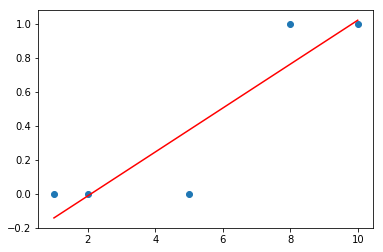

In [10]:
#Logistic regression을 simple linear regression으로 표현 (=0과 1값으로 나오는 데이터를 simple linear regression으로 처리)
#linear regression으로는 표현할 수 없다
#simple linear regression  입력 파라미터 한개  
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

#traning data set
x_data = [1,2,5,8,10]
y_data = [0,0,0,1,1]

#placeholder
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([1]),name="weight")  #0값은 오류 발생, w의 초기값은 난수 1개를 발생시켜서 만듬
b = tf.Variable(tf.random_normal([1]),name="bias")

#Hypothesis
H = W*X+b

#Cost(Loss) function (비용함수)   : 최소 제곱법 가설과 입력값 y의 차이의 제곱을 가지고 평균을 내는 것
#cost함수가 최소가 되는 w와 b값을 찾는다
cost = tf.reduce_mean(tf.square(H-Y))    


#train node를 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)   #계속 한단계씩 줄임/ learning_rate :w값을 얼마나 줄일지 조정


#session & 초기화          
sess = tf.Session()
sess.run(tf.global_variables_initializer())


#데이터를 잘 표현할 수 있는 기울기와 절편 구하기 (학습과정)
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if step % 300 == 0:   #cost값이 얼마인지 보기위해 작성
        print(cost_val)
        
plt.scatter(x_data,y_data)
plt.plot(x_data, sess.run(W)*x_data+sess.run(b), "r")
plt.show

x= (0.5 - sess.run(b))/sess.run(W)
x

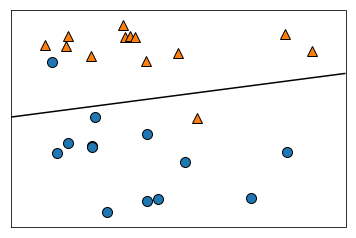

In [20]:
#가설(H)이 바뀌면 cost도 바꿔줘야 함(logistic에서는 linear에서 사용했던 방식 사용할 수 없음)

%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mglearn  #Sample Data를 가져오기 위한  utility module #샘플데이터를 사용하는 용도(굳이 사용안해도 내가 랜덤으로 만들어 사용할 수 있음)
from sklearn.linear_model import LogisticRegression
import warnings #warning메서지 제어

warnings.filterwarnings(action="ignore") #warning을 표시하지 않음
x,y=mglearn.datasets.make_forge()   #의미없는 데이터를 데이터셋으로 만들어줌
#x는 2차배열로 입력 파라미터 2개 / y는 0과1로 표현되는 1차원 배열
#x : x parameter(2개)
#y : lable(0 or 1)

mglearn.discrete_scatter(x[:,0],x[:,1],y)   #(x좌표, y좌표, 0이냐 1이냐), 
model=LogisticRegression()  #모델만들기
clf=model.fit(x,y) #학습진행 = for문 학습 과정

mglearn.plots.plot_2d_separator(clf,x,fill=False, eps=0.5) 

#logistic regression = 데이터영역을 구분해주는 선을 찾는게 목적, 어떻게하면 두개의 데이터를 잘 분리시켜줄까
#but, tensorflow방식을 주로 이용한다

In [34]:
#Tensorflow를 이용한 logistic regression
#DataLoading
#파일이나 network를 통해 데이터를 로딩한 후 전처리 과정

%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mglearn  #Sample Data를 가져오기 위한  utility module #샘플데이터를 사용하는 용도(굳이 사용안해도 내가 랜덤으로 만들어 사용할 수 있음)
from sklearn.linear_model import LogisticRegression
import warnings #warning메서지 제어

#traning data set (2차원 matrix로 표현)
x_data=[[10,0],
      [8,1],
      [3,3],
      [2,3],
      [5,1],
      [2,0],
      [1,0]]
y_data=[[1],[1],[1],[1],[0],[0],[0]] 

#placeholder(x_data, y_data 받음)
X=tf.placeholder(shape=[None,2],dtype=tf.float32) #x_data의 형태와 shape 맞춰줌
Y=tf.placeholder(shape=[None,1],dtype=tf.float32) #y_data의 형태와 shape 맞춰줌

#weight와 bias 지정
W=tf.Variable(tf.random_normal([2,1]), name="weight")  #변수로 지정(x의 열값,y의 열값)
b=tf.Variable(tf.random_normal([1]), name="bias")

#hypothesis
logit=tf.matmul(X,W)+b  #XW+b=Y linear regression의 hypothesis
H=tf.sigmoid(logit)

#Cost Funtion
#cost=-tf.reduce_mean(Y*tf.log(H)+(1-Y)*tf.log(1-H))
#위에 식을 간단하게 구하는 함수
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y)) 

#train node를 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)   #계속 한단계씩 줄임/ learning_rate :w값을 얼마나 줄일지 조정


#session & 초기화          
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):
    _, cost_val=sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    if step % 300 ==0:
        print(cost_val)
        
#우리가 만든 모델이 얼마나 정확한지를 측정
predict=tf.cast(H>0.5, dtype=tf.float32)   #cast는 타입변환함수
correct=tf.equal(predict, Y)  #실제 데이터와 예측값 비교해서 같으면 True 다르면 False
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도",sess.run(accuracy, feed_dict={X:x_data,Y:y_data}))

#prediction
print("예측값",sess.run(predict, feed_dict={X:[[3,1]]}))   #1=합격  0=불합격

3.2730477
0.48237714
0.42641994
0.38912827
0.36185488
0.34057602
0.32336357
0.30911133
0.29709342
0.28680155
정확도 0.85714287
예측값 [[0.]]


In [ ]:
#Logistic Regression(Binary Classification)

#실습예제1 : titanic
#실습예제2 : admission = 주어진 데이터의 70%를 사용 나머지 30%를 test용으로 사용

In [63]:
#Titanic 분석(Tensorflow)
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading 
data=pd.read_csv("./data/titanic_data.csv", sep=",")  #sep="," default값
data_x = data[["Sex","Age","Pclass","Fare"]]  #sex는 값들이 문자, pclass는 낮은 숫자가 가중치가 높음 => 바꿔줘야 함
data_y = data["Survived"]
display(data.head())

Pclass_dummies = pd.get_dummies(data_x["Pclass"],prefix="Pclass") #특정컬럼에 대해 더미 컬럼을 얻을 수 있음
data_x=data_x.join(Pclass_dummies)
data_x.drop("Pclass", axis=1, inplace=True)   #inplace=True 원본을 지워라, axis=1열방향

Sex_dummies=pd.get_dummies(data_x["Sex"], prefix="Sex")
data_x=data_x.join(Sex_dummies)
data_x.drop("Sex", axis=1, inplace=True)   #inplace=True 원본을 지워라, axis=1열방향

#training data set
x_data = MinMaxScaler().fit_transform(data_x.values)   #작은것에서 큰것빼서 ,정규화
y_data = data_y.values.reshape(-1,1)  #2차원 형태로 만들어줌

#placeholder
X=tf.placeholder(shape=[None,7], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

#weight & bias
W=tf.Variable(tf.random_normal([7,1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
logit=tf.matmul(X,W)+b
H=tf.sigmoid(logit)

#cost function
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

#train
train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session, 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정
for step in range(10000):
    _, cost_val=sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if step % 1000 ==0:
        print(cost_val)
        
#accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)  #같으면 예측이 잘된것
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도",sess.run(accuracy, feed_dict={X:x_data,Y:y_data}))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.3189149
0.51538926
0.48266202
0.47277537
0.46863934
0.46645114
0.46504468
0.46399298
0.46312332
0.4623604
정확도 0.7890011


In [67]:
#Admission
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading 
data=pd.read_csv("./data/admission.csv", sep=",")  #sep="," default값
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [131]:
#Admission
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading 
data=pd.read_csv("./data/admission.csv", sep=",")  #sep="," default값
data_x = data[["gre","gpa","rank"]]  #sex는 값들이 문자, pclass는 낮은 숫자가 가중치가 높음 => 바꿔줘야 함
data_y = data["admit"]
display(data.head())

rank_dummies = pd.get_dummies(data_x["rank"],prefix="rank") #특정컬럼에 대해 더미 컬럼을 얻을 수 있음
data_x=data_x.join(rank_dummies)
data_x.drop("rank", axis=1, inplace=True)   #inplace=True 원본을 지워라, axis=1열방향


#training data set
x_data = MinMaxScaler().fit_transform(data_x.values)   #작은것에서 큰것빼서 ,정규화
y_data = data_y.values.reshape(-1,1)  #2차원 형태로 만들어줌

x_data[280:,:]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


array([[0.75862069, 0.96551724, 0.        , 1.        , 0.        ,
        0.        ],
       [0.24137931, 0.58045977, 0.        , 0.        , 1.        ,
        0.        ],
       [0.75862069, 0.68390805, 0.        , 0.        , 0.        ,
        1.        ],
       [0.51724138, 0.48275862, 0.        , 0.        , 0.        ,
        1.        ],
       [0.37931034, 0.64942529, 0.        , 1.        , 0.        ,
        0.        ],
       [0.65517241, 0.60344828, 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.55172414, 1.        , 0.        , 0.        ,
        0.        ],
       [0.75862069, 0.82758621, 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.51149425, 0.        , 0.        , 0.        ,
        1.        ],
       [0.34482759, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.68965517, 0.68390805, 0.        , 1.        , 0.        ,
        0.        ],
       [1.        , 0

In [138]:
#Admission
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading 
data=pd.read_csv("./data/admission.csv", sep=",")  #sep="," default값
data_x = data[["gre","gpa","rank"]]  #sex는 값들이 문자, pclass는 낮은 숫자가 가중치가 높음 => 바꿔줘야 함
data_y = data["admit"]
display(data.head())

rank_dummies = pd.get_dummies(data_x["rank"],prefix="rank") #특정컬럼에 대해 더미 컬럼을 얻을 수 있음
data_x=data_x.join(rank_dummies)
data_x.drop("rank", axis=1, inplace=True)   #inplace=True 원본을 지워라, axis=1열방향


#training data set
x_data = MinMaxScaler().fit_transform(data_x.values)   #작은것에서 큰것빼서 ,정규화
y_data = data_y.values.reshape(-1,1)  #2차원 형태로 만들어줌

x_data_1=x_data[:280]
x_data_2=x_data[280:]

y_data_1=y_data[:280]
y_data_2=y_data[280:]

#placeholder
X=tf.placeholder(shape=[None,6], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

#weight & bias
W=tf.Variable(tf.random_normal([6,1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
logit=tf.matmul(X,W)+b
H=tf.sigmoid(logit)

#cost function
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

#train
train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session, 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정
for step in range(10000):
    _, cost_val=sess.run([train,cost], feed_dict={X:x_data_1,Y:y_data_1})
    if step % 1000 ==0:
        print(cost_val)
        
#accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)  #같으면 예측이 잘된것
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도",sess.run(accuracy, feed_dict={X:x_data_2,Y:y_data_2}))

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


0.93280315
0.599685
0.5769394
0.56594646
0.560286
0.5571434
0.55524355
0.5539897
0.5530923
0.55240566
정확도 0.68333334


In [137]:
import statsmodels.api as sm 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading 
data=pd.read_csv("./data/admission.csv", sep=",")  #sep="," default값
data_x = data[["gre","gpa","rank"]]  #sex는 값들이 문자, pclass는 낮은 숫자가 가중치가 높음 => 바꿔줘야 함
data_y = data["admit"]

rank_dummies = pd.get_dummies(data_x["rank"],prefix="rank") #특정컬럼에 대해 더미 컬럼을 얻을 수 있음
data_x=data_x.join(rank_dummies)
data_x.drop("rank", axis=1, inplace=True)   #inplace=True 원본을 지워라, axis=1열방향

logit = sm.Logit(data_y,data_x)  #모델생성
result=logit.fit() #학습과정
result.predict(data_x)  #예측

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


0      0.172627
1      0.292175
2      0.738408
3      0.178385
4      0.118354
5      0.369970
6      0.419246
7      0.217003
8      0.200735
9      0.517868
10     0.374314
11     0.400200
12     0.720539
13     0.353455
14     0.692380
15     0.185825
16     0.339939
17     0.078953
18     0.540228
19     0.573512
20     0.161221
21     0.437271
22     0.128375
23     0.192049
24     0.437594
25     0.682295
26     0.578481
27     0.204754
28     0.423073
29     0.458299
         ...   
370    0.398574
371    0.317087
372    0.376508
373    0.530854
374    0.411424
375    0.187357
376    0.415124
377    0.589590
378    0.202240
379    0.218961
380    0.463667
381    0.346029
382    0.349677
383    0.672759
384    0.186651
385    0.351893
386    0.528429
387    0.342879
388    0.339081
389    0.402750
390    0.400936
391    0.487194
392    0.222029
393    0.438725
394    0.253423
395    0.488670
396    0.165504
397    0.181062
398    0.463667
399    0.300731
Length: 400, dtype: floa

In [1]:
#머신러닝
#supervised learning(지도학습)
#-training data set에 label이 붙어 있음
#1.simple linear regression : 독립변수 한개(입력 파라미터 한개), hypothesis = w*x+b, cost function =>정확도를 알 수 없음
#2.mutiple linear regression : 독립변수 여러개(입력 파라미터 두개 이상), hypothesis =  x*w+b  =>정확도를 알 수 없음
#3.logistic regression(lable이 0 or 1) : 실제로 현실에서 많이 이용됨, 정확도를 측정할 수 있음(accuracy),다른말로 binary classification, 
#                                       H= sigmoid(w*x+b)
#4.multinomial classification
#둘중에 하나를 선택하는 선(ex A/BC  B/AC  C/AB) 여러개의 logistic이 합쳐져 있는 것
#어떤 값이 될 확률이 높은가를 나타냄

#unsupervised learning(비지도학습)
#-training data set에 label이 붙어있지 않음


In [18]:
#Multinomial Classification
import tensorflow as tf
#1.data loading
#2.training data set
x_data = [[10,7,8,5],
         [8,8,9,4],
         [7,8,2,3],
         [6,3,9,3],
         [7,5,7,4],
         [3,5,6,2],
         [2,4,3,1]]
y_data = [[1,0,0],                   #[A,B,C]  = A위치가 1이기에 A를 나타냄
         [1,0,0],
         [0,1,0],                   #[A,B,C]  = B위치가 1이기에 B를 나타냄
         [0,1,0],
         [0,1,0],
         [0,0,1],
         [0,0,1],]        

#placeholder
X=tf.placeholder(shape=[None,4], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)


#weight & bias
W =tf.Variable(tf.random_normal([4,3]), name="weight")
b =tf.Variable(tf.random_normal([3]), name="bias")

#Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

#Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)   #w값을 얼마만큼 줄여나갈것인가

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #변수 초기화

#학습
for step in range(3000):         #데이터가 작으니 많이 돌릴 수 있음'ㅅ'
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if step % 300 == 0:
        print(cost_val)


#Accuracy
#predict = H
#H => [[0.3  0.6  0.1]] 형태로 나타남

predict = tf.argmax(H,1)        #가장 큰 값의 인덱스를 알려줌
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:x_data,Y:y_data}) )

#예측
result=sess.run(predict, feed_dict={X:[[5,3,9,4]]})
if result[0] == 0:
    print("A")
elif result[0] == 1:
    print("B")
else:
    print("c")
    


8.609132
0.74994564
0.61223316
0.55954236
0.52501345
0.4976689
0.47433987
0.4537032
0.4350689
0.4180233
0.85714287
B


In [43]:
#bmi 예제 (multinomial classification)

import tensorflow as tf
import numpy as np
import pandas as pd

#1.Data loading
data = pd.read_csv("./data/bmi.csv", sep=",", skiprows=3)
data = data.dropna(how="any") # 결측값 제거
df_x = data[["height","weight"]]
df_y = data["label"]
df_y #=> 0,1,2 [1,0,0]  = 0

y_data=tf.one_hot(df_y,3)
sess=tf.Session()
y_data=sess.run(y_data)



#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)


#weight & bias
W =tf.Variable(tf.random_normal([2,3]), name="weight")
b =tf.Variable(tf.random_normal([3]), name="bias")

#Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

#Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)   #w값을 얼마만큼 줄여나가는 가

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):         #데이터가 작으니 많이 돌릴 수 있음'ㅅ'
    _, cost_val = sess.run([train,cost], feed_dict={X:df_x,Y:y_data})
    if step % 300 == 0:
        print(cost_val)

#Accuracy
#predict = H
#H => [[0.3  0.6  0.1]] 형태로 나타남

predict = tf.argmax(H,1)        #가장 큰 값의 인덱스를 알려줌
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:df_x,Y:y_data}) )

#예측
result=sess.run(predict, feed_dict={X:[[195,70]]})
if result[0] == 0:
    print("thin")
elif result[0] == 1:
    print("normal")
else:
    print("fat")
    


    




38.283905
12.45308
41.190025
25.17555
5.767573
7.5159054
22.493662
23.323841
8.134661
9.178581
0.70015
normal


In [1]:

#bmi 예제 (multinomial classification)

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings

#warning이 출력되지 않도록
warnings.filterwarnings(action="ignore")

#1.Data loading
data = pd.read_csv("./data/bmi.csv", sep=",", skiprows=3)
data = data.dropna(how="any") # 결측값 제거  but 결측값을 제거하는 것보단 대체하는 것이 좋음 

num_data=int(data.shape[0]*0.7)
data_train=data.loc[:num_data,:]
data_test=data.loc[num_data:,:]

train_x = data_train[["height","weight"]]
train_y = data_train["label"]

test_x = data_test[["height","weight"]]
test_y = data_test["label"]

sess = tf.Session()
scaler =MinMaxScaler()


#fit_transform(x) : x의 값들에서 최댓값 최솟값을 알아낸 뒤 (최댓값(해당데이터)-최솟값)/(최댓값(전체데이터)-최솟값)을 적용해 
#                   모든 값을 0과 1사이로 바꿔줌(정규화) 그리고 그 최댓값과 최솟값을 scaler에 저장
#transform(x) : fit_transform과 비슷한데 최댓값과 최솟값을 자기 데이터 내에서 찾아내는게 아니라 이미 앞에서 얻어낸(fit_transform)의 최댓값
#               과 최솟값을 사용해서 정규화를 함

train_x_data=scaler.fit_transform(train_x.values)  
train_y_data=sess.run(tf.one_hot(train_y,3))   #tf.one_hot(df_train_y,3).eval(session=sess)

test_x_data=scaler.transform(test_x.values)   #
test_y_data=sess.run(tf.one_hot(test_y,3))   #tf.one_hot(df_train_y,3).eval(session=sess)



#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)


#weight & bias
W =tf.Variable(tf.random_normal([2,3]), name="weight")
b =tf.Variable(tf.random_normal([3]), name="bias")

#Hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

#Cost(Loss) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)   #w값을 얼마만큼 줄여나가는 가

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):         #데이터가 작으니 많이 돌릴 수 있음'ㅅ'
    _, cost_val = sess.run([train,cost], feed_dict={X:train_x_data,Y:train_y_data})
    if step % 300 == 0:
        print(cost_val)

#Accuracy
#predict = H
#H => [[0.3  0.6  0.1]] 형태로 나타남

predict = tf.argmax(H,1)        #가장 큰 값의 인덱스를 알려줌
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy,feed_dict={X:test_x_data,Y:test_y_data}) )

#예측
result=sess.run(H, feed_dict={X:scaler.transform([[195,70]])})
#데이터를 정규화(0~1사이의 값)시켰기 때문에 예측하기위해 입력하는 데이터타입([195, 70])으로는 측정할 수가 없다. 그래서 넣는 값도 
#scaler에 저장된 최댓값과 최솟값으로 정규화시켜서 측정을 한다.

1.7766238
0.73740894
0.6035024
0.53363365
0.4880373
0.45474347
0.4287986
0.40771258
0.39006877
0.37498158
0.94766665


In [2]:
#MNIST - Multinomial Classification
#입력데이터(이미지에 대한 픽셀 데이터)
#원래 이미지 데이터는 3차원 데이터인데 흑백이고 2차원 데이터를 1차원으로 변환해서 입력을 받는다
#약 5만 5천개의 이미지를 입력으로 받음
#입력데이터의(x parameter)의 shape =>(5500, 784)
#y측 lable의 shape=(55000, 10)
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#1.Data loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)   #one_hot이 설정되어있는 형태로 불러들임 > 데이터 전처리 필요 없음
#mnist.train.num_examples   #이미지 몇장 우리에게 제공되는지
#mnist.train.images.shape   #x쪽 형태
#mnist.train.labels[0]  # 출력결과 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]) == 7을 의미
#sess=tf.Session()
#sess.run(tf.argmax(mnist.train.labels[0].reshape(-1,10),1)) # 출력결과 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]) == 7을 의미
#argmax 2차원 배열만 사용가능, 몇번째 순번이 1인지를 알아냄     출력결과 == array([7], dtype=int64)
#plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest")     #첫번째 그림 > 원래이미지 형태로 바꿈 > plt.imshow 이미지로 보여줌 >greys: 흑백으로 출력


#2.Placeholder
X=tf.placeholder(shape=[None,784], dtype=tf.float32)   #입력데이터의 shape에 따른다
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)    #0-9까지 표현되니깐 10

#3.weight & bias 
W=tf.Variable(tf.random_normal([784,10]), name="weight")
b=tf.Variable(tf.random_normal([10]), name="bias")    #logistic 10개

#4.Hypothesis
logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit)

#5.Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))
#크로스 엔트로피 함수와 소프트맥스 함수 함께 구현
#크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용
#logits = softmax 함수를 적용해서 정규화하기전의 모델의 출력값
#labels=정답레이블

#6.train
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#7.session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
1.2332479
0.59389
1.0663563
0.41165864
0.40290734
0.5910589
0.6547582
0.41876388
0.5416397
0.42193505
0.902
